# Wage Analysis with Data Split

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load generated data

In [2]:
data = pd.read_csv('./DATA/wage_data.csv')
print(data.head())

print("Data loaded successfully")

        educ      exper   exper_sq   ability  female  union     height  \
0  14.993428  16.996777  288.89040 -0.675178     1.0    1.0  178.08919   
1  13.723472  14.623168  213.83704 -0.144519     1.0    0.0  164.15544   
2  15.295377  10.298152  106.05193 -0.792420     0.0    1.0  162.50642   
3  17.046060   6.765316   45.76950 -0.307962     1.0    0.0  167.78464   
4  13.531693  13.491117  182.01022 -1.893615     0.0    0.0  158.23038   

   commute_km  birth_month  favorite_number clothing_color  log_wage  
0         1.7          1.0              8.0           blue  4.978068  
1         2.0          4.0              4.0           gray  4.968439  
2         4.5         10.0              8.0          white  5.270698  
3         5.7          7.0              9.0           blue  4.455431  
4         9.8          2.0              7.0           gray  4.859989  
Data loaded successfully


## 2. Transfer Categorical Features to dummies

In [3]:
# One-hot encode three categorical columns with drop_first=True
cat_cols = ['clothing_color', 'birth_month', 'favorite_number']

# Fit-time: create dummies from data
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)
print(data.head())
print("The categorical features were transformed to dummy variables.")

        educ      exper   exper_sq   ability  female  union     height  \
0  14.993428  16.996777  288.89040 -0.675178     1.0    1.0  178.08919   
1  13.723472  14.623168  213.83704 -0.144519     1.0    0.0  164.15544   
2  15.295377  10.298152  106.05193 -0.792420     0.0    1.0  162.50642   
3  17.046060   6.765316   45.76950 -0.307962     1.0    0.0  167.78464   
4  13.531693  13.491117  182.01022 -1.893615     0.0    0.0  158.23038   

   commute_km  log_wage  clothing_color_blue  ...  birth_month_11.0  \
0         1.7  4.978068                 True  ...             False   
1         2.0  4.968439                False  ...             False   
2         4.5  5.270698                False  ...             False   
3         5.7  4.455431                 True  ...             False   
4         9.8  4.859989                False  ...             False   

   birth_month_12.0  favorite_number_2.0  favorite_number_3.0  \
0             False                False                False  

## 3. Data Splitting

In [4]:
X = data.drop(columns=['log_wage'])
log_wage = data['log_wage']

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, log_wage, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

for df in [X_train, X_val, X_test, y_train, y_val, y_test]:
    df.reset_index(drop=True, inplace=True)
print("Data split successfully")

Data split successfully


## 4. Model Specifications

In [5]:
print("Show list of all variables")
print(X_train.columns.tolist())

# List of all variables
# ['educ', 'exper', 'exper_sq', 'ability', 'female', 'union', 'height', 'commute_km', 'clothing_color_blue', 'clothing_color_gray', 'clothing_color_other', 'clothing_color_white', 'birth_month_2.0', 'birth_month_3.0', 'birth_month_4.0', 'birth_month_5.0', 'birth_month_6.0', 'birth_month_7.0', 'birth_month_8.0', 'birth_month_9.0', 'birth_month_10.0', 'birth_month_11.0', 'birth_month_12.0', 'favorite_number_2.0', 'favorite_number_3.0', 'favorite_number_4.0', 'favorite_number_5.0', 'favorite_number_6.0', 'favorite_number_7.0', 'favorite_number_8.0', 'favorite_number_9.0']

model_specs = {
    "Basic": ['educ', 'exper'],
    "Core": ['educ', 'exper', 'ability'],
    "TrueDGP": ['educ', 'exper', 'exper_sq', 'ability', 'female', 'union'],
    "Overfit1": ['educ', 'exper', 'ability', 'female', 'union', 'height', 'commute_km', 'birth_month_2.0', 'birth_month_3.0', 'birth_month_4.0', 'birth_month_5.0', 'birth_month_6.0', 'birth_month_7.0', 'birth_month_8.0', 'birth_month_9.0', 'birth_month_10.0', 'birth_month_11.0', 'birth_month_12.0'],
    "Overfit2": ['educ', 'exper', 'ability', 'female', 'union', 
                'height', 'birth_month_2.0', 'birth_month_3.0', 'birth_month_4.0', 'birth_month_5.0', 'birth_month_6.0', 'birth_month_7.0', 'birth_month_8.0', 'birth_month_9.0', 'birth_month_10.0', 'birth_month_11.0', 'birth_month_12.0'],
    "Overfit3": ['educ', 'exper', 'ability', 'female', 'union',
                'height', 'birth_month_2.0', 'birth_month_3.0', 'birth_month_4.0', 'birth_month_5.0', 'birth_month_6.0', 'birth_month_7.0', 'birth_month_8.0', 'birth_month_9.0', 'birth_month_10.0', 'birth_month_11.0', 'birth_month_12.0', 'clothing_color_blue', 'clothing_color_gray', 'clothing_color_other', 'clothing_color_white'],
    "KitchenSink": list(set(X_train.columns))}

Show list of all variables
['educ', 'exper', 'exper_sq', 'ability', 'female', 'union', 'height', 'commute_km', 'clothing_color_blue', 'clothing_color_gray', 'clothing_color_other', 'clothing_color_white', 'birth_month_2.0', 'birth_month_3.0', 'birth_month_4.0', 'birth_month_5.0', 'birth_month_6.0', 'birth_month_7.0', 'birth_month_8.0', 'birth_month_9.0', 'birth_month_10.0', 'birth_month_11.0', 'birth_month_12.0', 'favorite_number_2.0', 'favorite_number_3.0', 'favorite_number_4.0', 'favorite_number_5.0', 'favorite_number_6.0', 'favorite_number_7.0', 'favorite_number_8.0', 'favorite_number_9.0']


## 5. Model Evaluation

In [6]:
def evaluate_model(variables, X_train, y_train, X_val, y_val, X_test, y_test):
    # try:
    X_train_sm = sm.add_constant(X_train[variables])*1
    # print(X_train_sm.head())
    print(X_train_sm.head())
    print(y_train.head())
    model = sm.OLS(y_train, X_train_sm).fit()

    def calc_mse(X, y):
        X_sm = sm.add_constant(X[variables])
        return ((y - model.predict(X_sm))**2).mean()

    train_mse = calc_mse(X_train, y_train)
    val_mse = calc_mse(X_val, y_val)

    return {
        'model': model,
        'train_mse': train_mse,
        'val_mse': val_mse,
        'test_mse': calc_mse(X_test, y_test),
        'overfit_gap': val_mse - train_mse,
        'adj_r2': model.rsquared_adj,
        'n_vars': len(variables)
    }
    # except Exception as e:
    #     print(f"Error in {variables}: {str(e)}")
    #     return None

## 6. Train and Evaluate Models

In [7]:
model_performance = {}
for name, vars in model_specs.items():
    result = evaluate_model(vars, X_train, y_train, X_val, y_val, X_test, y_test)
    model_performance[name] = result
    print(f"{name:12} | Vars: {len(vars):2} | Val MSE: {result['val_mse']:.4f} | Gap: {result['overfit_gap']:.4f}")

   const       educ      exper
0    1.0  12.911235  18.637716
1    1.0  15.515016  11.973357
2    1.0  12.846216   4.361311
3    1.0  10.676960   1.157803
4    1.0  14.962018   7.868212
0    4.259436
1    4.188040
2    4.456693
3    3.226458
4    4.671561
Name: log_wage, dtype: float64
Basic        | Vars:  2 | Val MSE: 0.3427 | Gap: 0.0248
   const       educ      exper   ability
0    1.0  12.911235  18.637716 -3.019512
1    1.0  15.515016  11.973357  0.037938
2    1.0  12.846216   4.361311  0.054934
3    1.0  10.676960   1.157803 -0.926381
4    1.0  14.962018   7.868212  0.457280
0    4.259436
1    4.188040
2    4.456693
3    3.226458
4    4.671561
Name: log_wage, dtype: float64
Core         | Vars:  3 | Val MSE: 0.2843 | Gap: 0.0194
   const       educ      exper    exper_sq   ability  female  union
0    1.0  12.911235  18.637716  347.364470 -3.019512     0.0    0.0
1    1.0  15.515016  11.973357  143.361280  0.037938     1.0    0.0
2    1.0  12.846216   4.361311   19.021032  0.0549

## 7. Results Analysis

### Overfit Gap

#### What it means:
The difference between a model's performance on training data vs. validation/test data (Validation MSE - Training MSE). It measures how much worse the model performs on unseen data.

#### How to interpret it:

Gap Size	Interpretation
< 0.001	Minimal overfitting
0.001-0.003	Moderate overfitting
> 0.003	Severe overfitting
In our visualization:

Shown as red bars growing taller for more complex models
The "KitchenSink" model has the largest gap
The "TrueDGP" model has the smallest gap

In [8]:
results_df = pd.DataFrame([
    {
        'Model': name,
        'Num Vars': perf['n_vars'],
        'Train MSE': perf['train_mse'],
        'Val MSE': perf['val_mse'],
        'Test MSE': perf['test_mse'],
        'Overfit Gap': perf['overfit_gap'],
        'Adj R2': perf['adj_r2']
    }
    for name, perf in model_performance.items()
]).sort_values('Val MSE')

def highlight_overfit(val):
    color = 'red' if val > 0.003 else ('orange' if val > 0.001 else 'green')
    return f'background-color: {color}'

display(results_df.style.format({
    'Train MSE': '{:.4f}',
    'Val MSE': '{:.4f}',
    'Test MSE': '{:.4f}',
    'Overfit Gap': '{:.4f}',
    'Adj R2': '{:.4f}'
}).map(highlight_overfit, subset=['Overfit Gap']))

,Model,Num Vars,Train MSE,Val MSE,Test MSE,Overfit Gap,Adj R2
2,TrueDGP,6,0.2290,0.2414,0.2319,0.0125,0.5069
5,Overfit3,21,0.2244,0.2505,0.2474,0.0261,0.5043
4,Overfit2,17,0.2265,0.2505,0.2396,0.0240,0.5030
3,Overfit1,18,0.2265,0.2509,0.2397,0.0244,0.5023
6,KitchenSink,31,0.2208,0.2553,0.2468,0.0345,0.5036
1,Core,3,0.2649,0.2843,0.2766,0.0194,0.4324
0,Basic,2,0.3179,0.3427,0.3556,0.0248,0.3200


## 7. Visualization

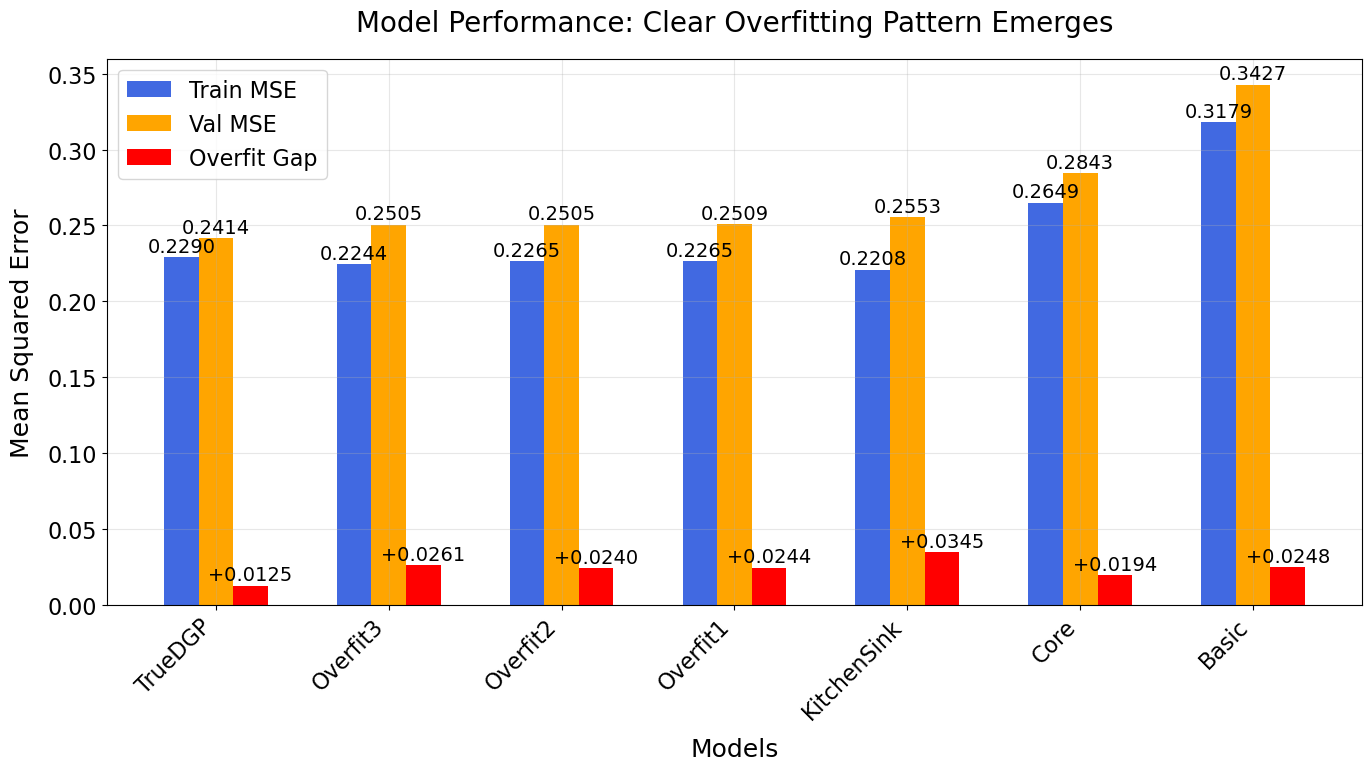

In [9]:
plt.figure(figsize=(14, 8))

# Set global font sizes (affects all text elements)
plt.rcParams.update({
    'font.size': 16,          # Base font size (originally 8-10)
    'axes.titlesize': 20,     # Title font size (originally 10)
    'axes.labelsize': 18,     # Axis label font size (originally 9)
    'xtick.labelsize': 16,    # X-axis tick label size (originally 8)
    'ytick.labelsize': 16,    # Y-axis tick label size (originally 8)
    'legend.fontsize': 16     # Legend font size (originally 10)
})

models = results_df['Model']
x = np.arange(len(models))
width = 0.2

# Create bars (colors remain the same)
train_bars = plt.bar(x - width, results_df['Train MSE'], width,
                    color='royalblue', label='Train MSE')

val_bars = plt.bar(x, results_df['Val MSE'], width,
                  color='orange', label='Val MSE')

gap_bars = plt.bar(x + width, results_df['Overfit Gap'], width,
                  color='red', label='Overfit Gap')

# Set labels and title (font sizes set globally via rcParams)
plt.xlabel('Models', labelpad=10)  # Increased label padding
plt.ylabel('Mean Squared Error', labelpad=10)
plt.title('Model Performance: Clear Overfitting Pattern Emerges', pad=20)

# Configure x-axis ticks
plt.xticks(x, models, rotation=45, ha='right')  # Right-aligned rotated labels
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels (with larger font)
for i in x:
    plt.text(i - width, results_df.iloc[i]['Train MSE'] + 0.001,
             f"{results_df.iloc[i]['Train MSE']:.4f}",
             ha='center', va='bottom', fontsize=14)  # Slightly smaller than titles

    plt.text(i, results_df.iloc[i]['Val MSE'] + 0.001,
             f"{results_df.iloc[i]['Val MSE']:.4f}",
             ha='center', va='bottom', fontsize=14)

    plt.text(i + width, results_df.iloc[i]['Overfit Gap'] + 0.001,
             f"+{results_df.iloc[i]['Overfit Gap']:.4f}",
             ha='center', va='bottom', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [10]:
best_model_name = results_df.iloc[0]['Model']
best_model = model_performance[best_model_name]

print(f"\n=== Best Performing Model ===\n{best_model_name}")
print(f"Variables: {model_specs[best_model_name]}")
print(f"Validation MSE: {best_model['val_mse']:.4f}")
print(f"Overfit Gap: {best_model['overfit_gap']:.4f}")

print("\n=== Worst Performing Model ===")
worst_model_name = results_df.iloc[-1]['Model']
worst_model = model_performance[worst_model_name]
print(f"{worst_model_name} (Val MSE: {worst_model['val_mse']:.4f})")
print(f"Included {worst_model['n_vars']} variables vs {best_model['n_vars']} in best model")


=== Best Performing Model ===
TrueDGP
Variables: ['educ', 'exper', 'exper_sq', 'ability', 'female', 'union']
Validation MSE: 0.2414
Overfit Gap: 0.0125

=== Worst Performing Model ===
Basic (Val MSE: 0.3427)
Included 2 variables vs 6 in best model
